## Final Report 
### WIP

In [1]:
# Imports

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm


In [2]:
# Reading in the data
df_ucsc = pd.read_csv('Datasets/UC_Santa_Cruz.csv', dtype={'date': 'str', 'word_count':int, 'school':'str'})
df_ucm = pd.read_csv('Datasets/UC_Merced.csv', dtype={'date': 'str', 'word_count':int, 'school':'str'})
df_ucd = pd.read_csv('Datasets/UC_Davis.csv', dtype={'date': 'str', 'word_count':int, 'school':'str'})

In [3]:
# Take a look at Santa Cruz
df_ucsc

,date,word_count,school
0,24-Jan-20,414,Santa Cruz
1,30-Jan-20,382,Santa Cruz
2,31-Jan-20,338,Santa Cruz
3,4-Feb-20,1276,Santa Cruz
4,4-Feb-20,989,Santa Cruz
...,...,...,...
62,24-Apr-20,237,Santa Cruz
63,27-Apr-20,472,Santa Cruz
64,1-May-20,876,Santa Cruz
65,4-May-20,403,Santa Cruz


In [4]:
# Take a look at Merced
df_ucm

,date,word_count,school
0,4-Feb-20,190,Merced
1,28-Feb-20,457,Merced
2,6-Mar-20,468,Merced
3,8-Mar-20,411,Merced
4,9-Mar-20,489,Merced
...,...,...,...
68,28-Apr-20,446,Merced
69,29-Apr-20,741,Merced
70,4-May-20,621,Merced
71,6-May-20,470,Merced


In [5]:
# Note: Davis had 4 empty columns at the end of its' dataframe they have been removed
df_ucd = df_ucd.drop(columns = ['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'])

# Take a look at Davis
df_ucd

,date,word_count,school
0,31-Jan-20,1043,Davis
1,1-Feb-20,68,Davis
2,3-Feb-20,162,Davis
3,7-Feb-20,40,Davis
4,10-Feb-20,30,Davis
5,13-Feb-20,61,Davis
6,25-Feb-20,82,Davis
7,27-Feb-20,74,Davis
8,27-Feb-20,105,Davis
9,27-Feb-20,78,Davis


In [6]:
# concatenating the dataframes together
df = pd.concat([df_ucsc, df_ucm, df_ucd])

#looking at the entire dataframe
print(df.to_string())

         date  word_count      school
0   24-Jan-20         414  Santa Cruz
1   30-Jan-20         382  Santa Cruz
2   31-Jan-20         338  Santa Cruz
3    4-Feb-20        1276  Santa Cruz
4    4-Feb-20         989  Santa Cruz
5    5-Feb-20         273  Santa Cruz
6    7-Feb-20         700  Santa Cruz
7    7-Feb-20         359  Santa Cruz
8   10-Feb-20         178  Santa Cruz
9   11-Feb-20          89  Santa Cruz
10  19-Feb-20          39  Santa Cruz
11  24-Feb-20          15  Santa Cruz
12  25-Feb-20         511  Santa Cruz
13  28-Feb-20          86  Santa Cruz
14  29-Feb-20        1237  Santa Cruz
15   2-Mar-20         144  Santa Cruz
16   4-Mar-20         490  Santa Cruz
17   5-Mar-20         930  Santa Cruz
18   6-Mar-20        1186  Santa Cruz
19   8-Mar-20        1018  Santa Cruz
20   9-Mar-20         481  Santa Cruz
21   9-Mar-20        1202  Santa Cruz
22  10-Mar-20         849  Santa Cruz
23  10-Mar-20         708  Santa Cruz
24  10-Mar-20         999  Santa Cruz
25  11-Mar-2

In [7]:
# The above concatenated data appears to be separated by the order they were concatenated in
# To fix this we want them to be ordered by their dates

# Set the index to order by date via the datetime on the 'date' column
df.set_index(pd.to_datetime(df['date']), inplace = True)

# Now that the index is set to datetime drop the original date column
df = df.drop(columns = ['date'])

# order the dataframe by datetime (index) 
df = df.sort_index()

df

,word_count,school
date,,
2020-01-24,414,Santa Cruz
2020-01-30,382,Santa Cruz
2020-01-31,1043,Davis
2020-01-31,338,Santa Cruz
2020-02-01,68,Davis
...,...,...
2020-05-04,403,Santa Cruz
2020-05-04,1023,Santa Cruz
2020-05-04,621,Merced


In [9]:
#looking at the entire dataframe
print(df.to_string())


            word_count      school
date                              
2020-01-24         414  Santa Cruz
2020-01-30         382  Santa Cruz
2020-01-31        1043       Davis
2020-01-31         338  Santa Cruz
2020-02-01          68       Davis
2020-02-03         162       Davis
2020-02-04        1276  Santa Cruz
2020-02-04         989  Santa Cruz
2020-02-04         190      Merced
2020-02-05         273  Santa Cruz
2020-02-07         700  Santa Cruz
2020-02-07         359  Santa Cruz
2020-02-07          40       Davis
2020-02-10         178  Santa Cruz
2020-02-10          30       Davis
2020-02-11          89  Santa Cruz
2020-02-13          61       Davis
2020-02-19          39  Santa Cruz
2020-02-24          15  Santa Cruz
2020-02-25          82       Davis
2020-02-25         511  Santa Cruz
2020-02-27          78       Davis
2020-02-27         105       Davis
2020-02-27          74       Davis
2020-02-27          81       Davis
2020-02-28         165       Davis
2020-02-28         4

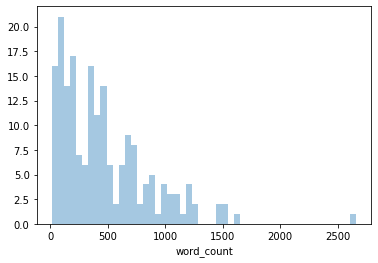

In [18]:
sns.distplot(df['word_count'], kde = False, bins=50)

In [15]:
uscs_dict = df.groupby(df['school'] == 'Santa Cruz')[index]


NameError: name 'index' is not defined